**H0**=Rainfall does not lead to a decrease in recent PM2.5 levels, applicable to Corpus Christi, Houston, and Austin.

**Ha**=Rainfall leads to a decrease in recent PM2.5 levels, applicable to Corpus Christi, Houston, and Austin.

**Data Sce:** [Climatology Lab](https://climate.northwestknowledge.net/NWTOOLBOX/formattedDownloads.php) , [U.S. Environmental Protection Agency](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)


In [ ]:
#install required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read files from drive
corpus_air=pd.read_excel('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/precp_pm_corpus_27feb.xlsx')
austin_air=pd.read_excel('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/precp_pm_austin_27feb.xlsx')
houston_air=pd.read_excel('/content/drive/MyDrive/Texas/Courses/Data Analytics/Hypothesis/precp_pm_houston_27feb.xlsx')

In [ ]:
corpus_air.columns

Index(['Date', 'Year', 'Month', 'ppt_in', 'Daily_Mean_PM_2_5_Concentration'], dtype='object')

In [ ]:
#sample data frame contents
corpus_air.head()

,Date,Year,Month,ppt_in,Daily_Mean_PM_2_5_Concentration
0,2019-01-01,2019,1,1.73,6.638710
1,2019-02-01,2019,2,0.98,9.728571
2,2019-03-01,2019,3,0.93,9.916000
3,2019-04-01,2019,4,2.35,9.396667
4,2019-05-01,2019,5,4.61,11.241935


# Check the Normality

First, we need to check the **normality** of precipitation data

<ipython-input-14-13d3a8f5d782>:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=2, color='red')  # Change color as needed


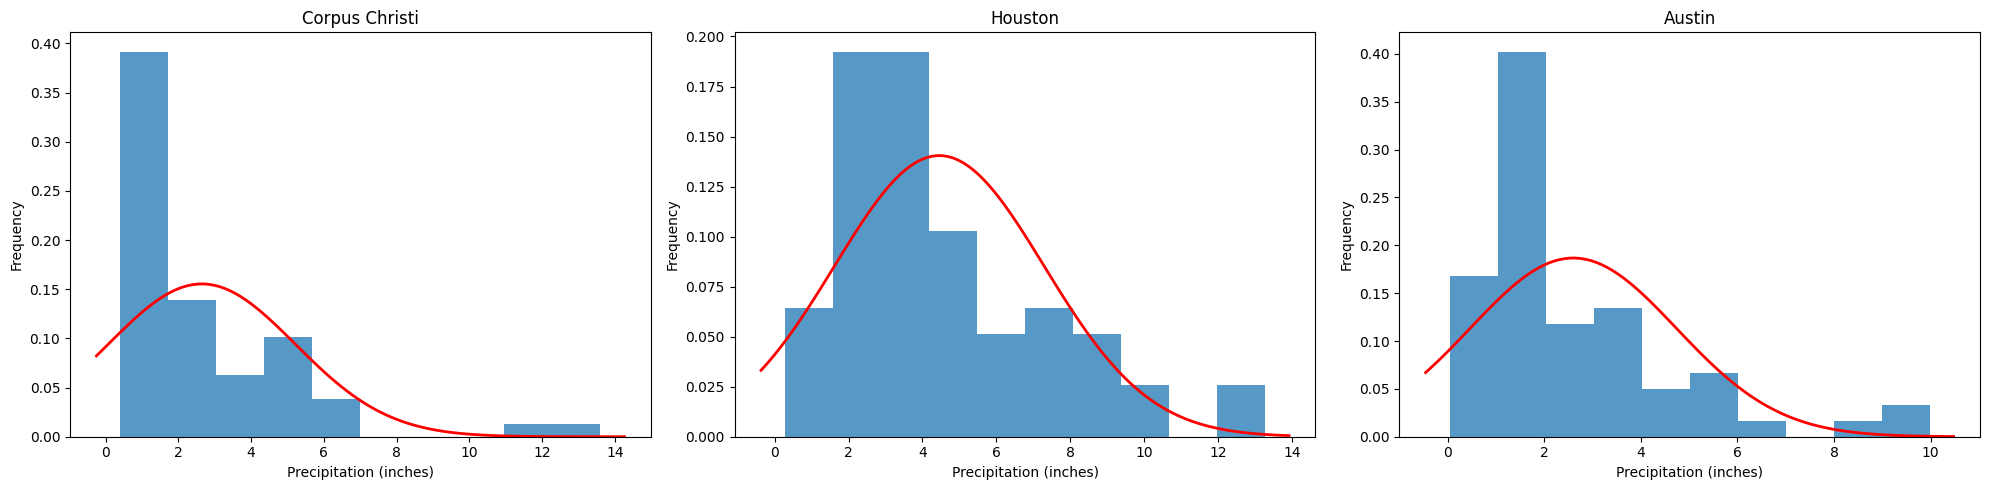

In [ ]:
#Plot histograms
from scipy.stats import norm

# Assuming my data frames are named correctly as mentioned
data_frames = {
    'Corpus Christi': corpus_air,
    'Houston': houston_air,
    'Austin': austin_air
}

# Setting up the figure and axes for the histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust the figsize as needed

# Flatten the axes array to iterate over it correctly
axes_flat = axes.flatten()

# Loop through the data frames and plot histograms on the flattened axes
for ax, (city, df) in zip(axes_flat, data_frames.items()):
    # Plot histogram
    data = df['ppt_in'].dropna()  # Drop NaN values for the histogram
    n, bins, patches = ax.hist(data, bins=10, alpha=0.75, density=True)  # Use density=True for normalization

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the bell curve (normal distribution curve)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, color='red')  # Change color as needed

    # Set titles and labels
    ax.set_title(f'{city}')
    ax.set_xlabel('Precipitation (inches)')
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
from scipy.stats import shapiro

#Let's test the normality of data

# Data frames for each city
data_frames = {

    'Corpus Christi': corpus_air,
    'Austin': austin_air,
    'Houston': houston_air

}

# Perform Shapiro-Wilk test for normality on the ppt_in column for each city
shapiro_results = {}

for city, df in data_frames.items():
    stat, p = shapiro(df['ppt_in'])
    shapiro_results[city] = (stat, p)
    print(f"{city}:\nShapiro-Wilk Test Statistic = {stat}, p-value = {p}\n")

# Inspecting the results
for city, (stat, p) in shapiro_results.items():
    if p > 0.05:
        print(f"The precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The precipitation data for {city} does not appear to be normally distributed (reject H0).")


Corpus Christi:
Shapiro-Wilk Test Statistic = 0.7431988716125488, p-value = 6.65330901483685e-09

Austin:
Shapiro-Wilk Test Statistic = 0.8268986940383911, p-value = 6.76144850331184e-07

Houston:
Shapiro-Wilk Test Statistic = 0.9104131460189819, p-value = 0.0003222348168492317

The precipitation data for Corpus Christi does not appear to be normally distributed (reject H0).
The precipitation data for Austin does not appear to be normally distributed (reject H0).
The precipitation data for Houston does not appear to be normally distributed (reject H0).


The **Shapiro-Wilk** test is used to assess the normality of a dataset. The null hypothesis (H0) for this test posits that the data is normally distributed. A low p-value (typically < 0.05) suggests that we can reject the null hypothesis, indicating the data does not follow a normal distribution.

For all three cities—**Corpus Christi**, **Austin**, and **Houston**—the **Shapiro-Wilk** test results suggest that the precipitation data is not **normally** distributed. This has implications for statistical analysis, indicating that parametric tests that assume normality may not be appropriate without data transformation.

We need to check the **normality** of PM2.5 data


<ipython-input-16-78b47c5df04f>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=2, color='red')  # Change color as needed


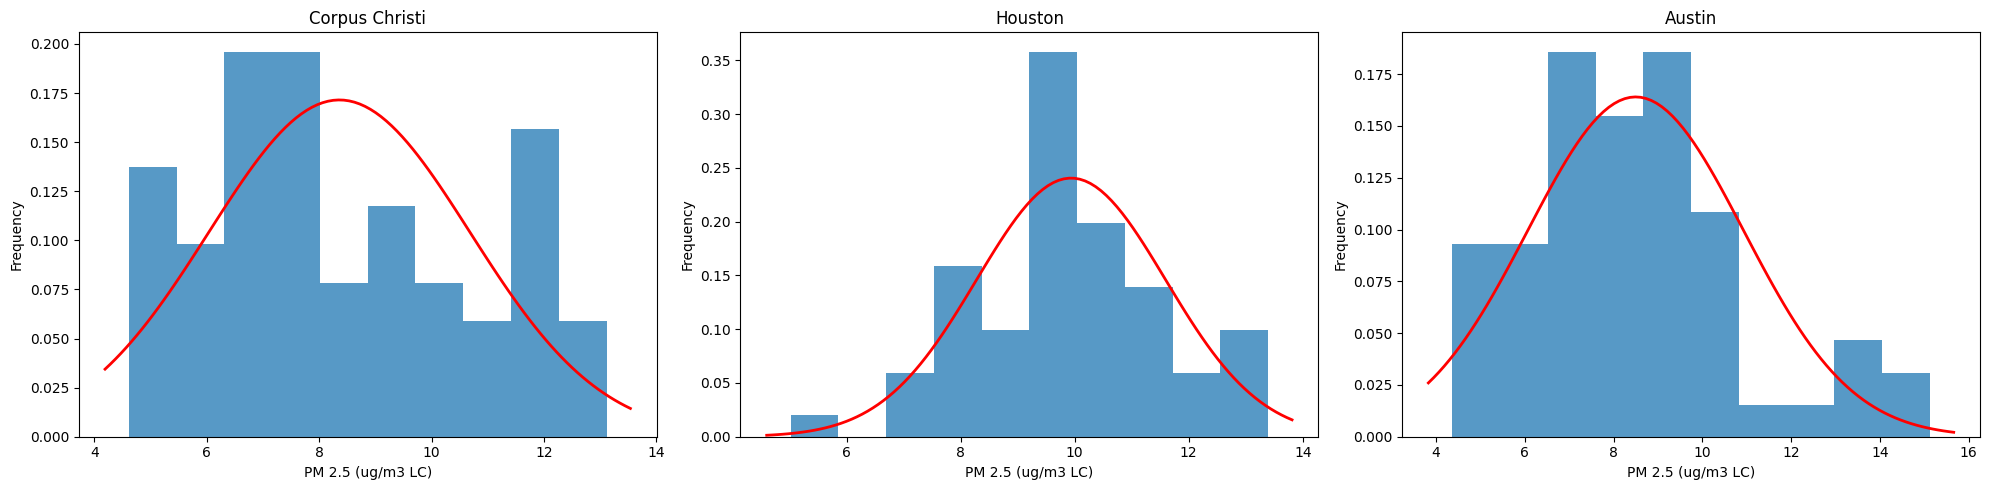

In [ ]:

data_frames = {
    'Corpus Christi': corpus_air,
    'Houston': houston_air,
    'Austin': austin_air
}

# Setting up the figure and axes for the histograms
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Adjust the figsize as needed

# Flatten the axes array to iterate over it correctly
axes_flat = axes.flatten()

# Loop through the data frames and plot histograms on the flattened axes
for ax, (city, df) in zip(axes_flat, data_frames.items()):
    # Plot histogram
    data = df['Daily_Mean_PM_2_5_Concentration'].dropna()  # Drop NaN values for the histogram
    n, bins, patches = ax.hist(data, bins=10, alpha=0.75, density=True)  # Use density=True for normalization

    # Fit a normal distribution to the data
    mu, std = norm.fit(data)

    # Plot the bell curve (normal distribution curve)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, color='red')  # Change color as needed

    # Set titles and labels
    ax.set_title(f'{city}')
    ax.set_xlabel('PM 2.5 (ug/m3 LC)')
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:

#Let's test the normality of data

# Data frames for each city
data_frames = {

    'Corpus Christi': corpus_air,
    'Austin': austin_air,
    'Houston': houston_air

}

# Perform Shapiro-Wilk test for normality on the ppt_in column for each city
shapiro_results = {}

for city, df in data_frames.items():
    stat, p = shapiro(df['Daily_Mean_PM_2_5_Concentration'])
    shapiro_results[city] = (stat, p)
    print(f"{city}:\nShapiro-Wilk Test Statistic = {stat}, p-value = {p}\n")

# Inspecting the results
for city, (stat, p) in shapiro_results.items():
    if p > 0.05:
        print(f"The PM 2.5 data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The PM 2.5 data for {city} does not appear to be normally distributed (reject H0).")


Corpus Christi:
Shapiro-Wilk Test Statistic = 0.9542403817176819, p-value = 0.024758266285061836

Austin:
Shapiro-Wilk Test Statistic = 0.9561682343482971, p-value = 0.03064909018576145

Houston:
Shapiro-Wilk Test Statistic = 0.9796170592308044, p-value = 0.4125528633594513

The PM 2.5 data for Corpus Christi does not appear to be normally distributed (reject H0).
The PM 2.5 data for Austin does not appear to be normally distributed (reject H0).
The PM 2.5 data for Houston seems to be normally distributed (fail to reject H0).


The **PM2.5** data for **Corpus Christi** and **Austin** do not follow a normal distribution, as indicated by the p-values which are below the threshold of 0.05. For **Houston**, however, the PM2.5 data does not show evidence against a normal distribution, as its p-value is well above the threshold

# Check transformation:  Logarithmic transformation & Square root transformation

Considering histograms and **Shapiro-Wilk** result, it's suggested that do **transformation** on data.
There are two choise: **log** or **sqrt**. Let's check both.

In [ ]:
# Data frames for each city
data_frames = {
    'Corpus Christi': corpus_air,
    'Austin': austin_air,
    'Houston': houston_air

}

# Function to safely compute the logarithm (adding a small constant to avoid log(0))
def safe_log(x, minval=0.01):
    return np.log(x + minval)

# Perform Shapiro-Wilk test for normality on the log and sqrt of ppt_in column for each city
shapiro_results_log = {}
shapiro_results_sqrt = {}

for city, df in data_frames.items():
    # Log transformation (assuming ppt_in > 0)
    df['ppt_in_log'] = safe_log(df['ppt_in'])
    stat_log, p_log = shapiro(df['ppt_in_log'])
    shapiro_results_log[city] = (stat_log, p_log)

    # Sqrt transformation
    df['ppt_in_sqrt'] = np.sqrt(df['ppt_in'])
    stat_sqrt, p_sqrt = shapiro(df['ppt_in_sqrt'])
    shapiro_results_sqrt[city] = (stat_sqrt, p_sqrt)

    print(f"{city} Log:\nShapiro-Wilk Test Statistic = {stat_log}, p-value = {p_log}")
    print(f"{city} Sqrt:\nShapiro-Wilk Test Statistic = {stat_sqrt}, p-value = {p_sqrt}\n")

# Inspecting the results for log transformation
print("Log Transformation Results:")
for city, (stat, p) in shapiro_results_log.items():
    if p > 0.05:
        print(f"The log-transformed precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The log-transformed precipitation data for {city} does not appear to be normally distributed (reject H0).")

# Inspecting the results for sqrt transformation
print("\nSqrt Transformation Results:")
for city, (stat, p) in shapiro_results_sqrt.items():
    if p > 0.05:
        print(f"The sqrt-transformed precipitation data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The sqrt-transformed precipitation data for {city} does not appear to be normally distributed (reject H0).")


Corpus Christi Log:
Shapiro-Wilk Test Statistic = 0.9597998261451721, p-value = 0.046002041548490524
Corpus Christi Sqrt:
Shapiro-Wilk Test Statistic = 0.8831697702407837, p-value = 3.381424176041037e-05

Austin Log:
Shapiro-Wilk Test Statistic = 0.9366022944450378, p-value = 0.0038282363675534725
Austin Sqrt:
Shapiro-Wilk Test Statistic = 0.9538090229034424, p-value = 0.02360888384282589

Houston Log:
Shapiro-Wilk Test Statistic = 0.9625805616378784, p-value = 0.06295744329690933
Houston Sqrt:
Shapiro-Wilk Test Statistic = 0.9804133176803589, p-value = 0.44626927375793457

Log Transformation Results:
The log-transformed precipitation data for Corpus Christi does not appear to be normally distributed (reject H0).
The log-transformed precipitation data for Austin does not appear to be normally distributed (reject H0).
The log-transformed precipitation data for Houston seems to be normally distributed (fail to reject H0).

Sqrt Transformation Results:
The sqrt-transformed precipitation d

**Corpus Christi:** Both transformations suggest non-normality, with **log** transformation being borderline.
**Austin:** It seems both transformations indicate non-normality, with the data not conforming to a normal distribution after transformation, by the way as the log indicates better result we aill apply it on precipitation data.
**Houston:** Both transformations suggest that the data may be normally distributed, with sqrt transformation providing stronger evidence for normality.


In [ ]:
# Data frames for each city
data_frames = {
    'Corpus Christi': corpus_air,
    'Austin': austin_air,
    'Houston': houston_air

}

# Function to safely compute the logarithm (adding a small constant to avoid log(0))
def safe_log(x, minval=0.01):
    return np.log(x + minval)

# Perform Shapiro-Wilk test for normality on the log and sqrt of ppt_in column for each city
shapiro_results_log = {}
shapiro_results_sqrt = {}

for city, df in data_frames.items():
    # Log transformation (assuming ppt_in > 0)
    df['Daily_Mean_PM_2_5_Concentration_log'] = safe_log(df['Daily_Mean_PM_2_5_Concentration'])
    stat_log, p_log = shapiro(df['Daily_Mean_PM_2_5_Concentration_log'])
    shapiro_results_log[city] = (stat_log, p_log)

    # Sqrt transformation
    df['Daily_Mean_PM_2_5_Concentration_sqrt'] = np.sqrt(df['Daily_Mean_PM_2_5_Concentration'])
    stat_sqrt, p_sqrt = shapiro(df['Daily_Mean_PM_2_5_Concentration_sqrt'])
    shapiro_results_sqrt[city] = (stat_sqrt, p_sqrt)

    print(f"{city} Log:\nShapiro-Wilk Test Statistic = {stat_log}, p-value = {p_log}")
    print(f"{city} Sqrt:\nShapiro-Wilk Test Statistic = {stat_sqrt}, p-value = {p_sqrt}\n")

# Inspecting the results for log transformation
print("Log Transformation Results:")
for city, (stat, p) in shapiro_results_log.items():
    if p > 0.05:
        print(f"The log-transformed PM 2.5 data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The log-transformed PM 2.5 data for {city} does not appear to be normally distributed (reject H0).")

# Inspecting the results for sqrt transformation
print("\nSqrt Transformation Results:")
for city, (stat, p) in shapiro_results_sqrt.items():
    if p > 0.05:
        print(f"The sqrt-transformed PM 2.5 data for {city} seems to be normally distributed (fail to reject H0).")
    else:
        print(f"The sqrt-transformed PM 2.5 data for {city} does not appear to be normally distributed (reject H0).")


Corpus Christi Log:
Shapiro-Wilk Test Statistic = 0.9617359638214111, p-value = 0.05722285807132721
Corpus Christi Sqrt:
Shapiro-Wilk Test Statistic = 0.9620508551597595, p-value = 0.05929594486951828

Austin Log:
Shapiro-Wilk Test Statistic = 0.9828988313674927, p-value = 0.5625401735305786
Austin Sqrt:
Shapiro-Wilk Test Statistic = 0.9779966473579407, p-value = 0.3497956097126007

Houston Log:
Shapiro-Wilk Test Statistic = 0.9513238668441772, p-value = 0.01798364892601967
Houston Sqrt:
Shapiro-Wilk Test Statistic = 0.9716253280639648, p-value = 0.17514987289905548

Log Transformation Results:
The log-transformed PM 2.5 data for Corpus Christi seems to be normally distributed (fail to reject H0).
The log-transformed PM 2.5 data for Austin seems to be normally distributed (fail to reject H0).
The log-transformed PM 2.5 data for Houston does not appear to be normally distributed (reject H0).

Sqrt Transformation Results:
The sqrt-transformed PM 2.5 data for Corpus Christi seems to be no

For **Corpus Christi**, both the log and sqrt transformations result in p-values slightly above 0.05, suggesting that the data is approximately normally distributed after transformation.

For **Austin**, both transformations yield high p-values, indicating a strong likelihood that the transformed data is normally distributed.


For **Houston**, the log transformation does not result in a normal distribution (since the p-value is below 0.05), but the sqrt transformation seems to result in normally distributed data (p-value is above 0.05).

# Compare the original and transformed data for Corpus Christi

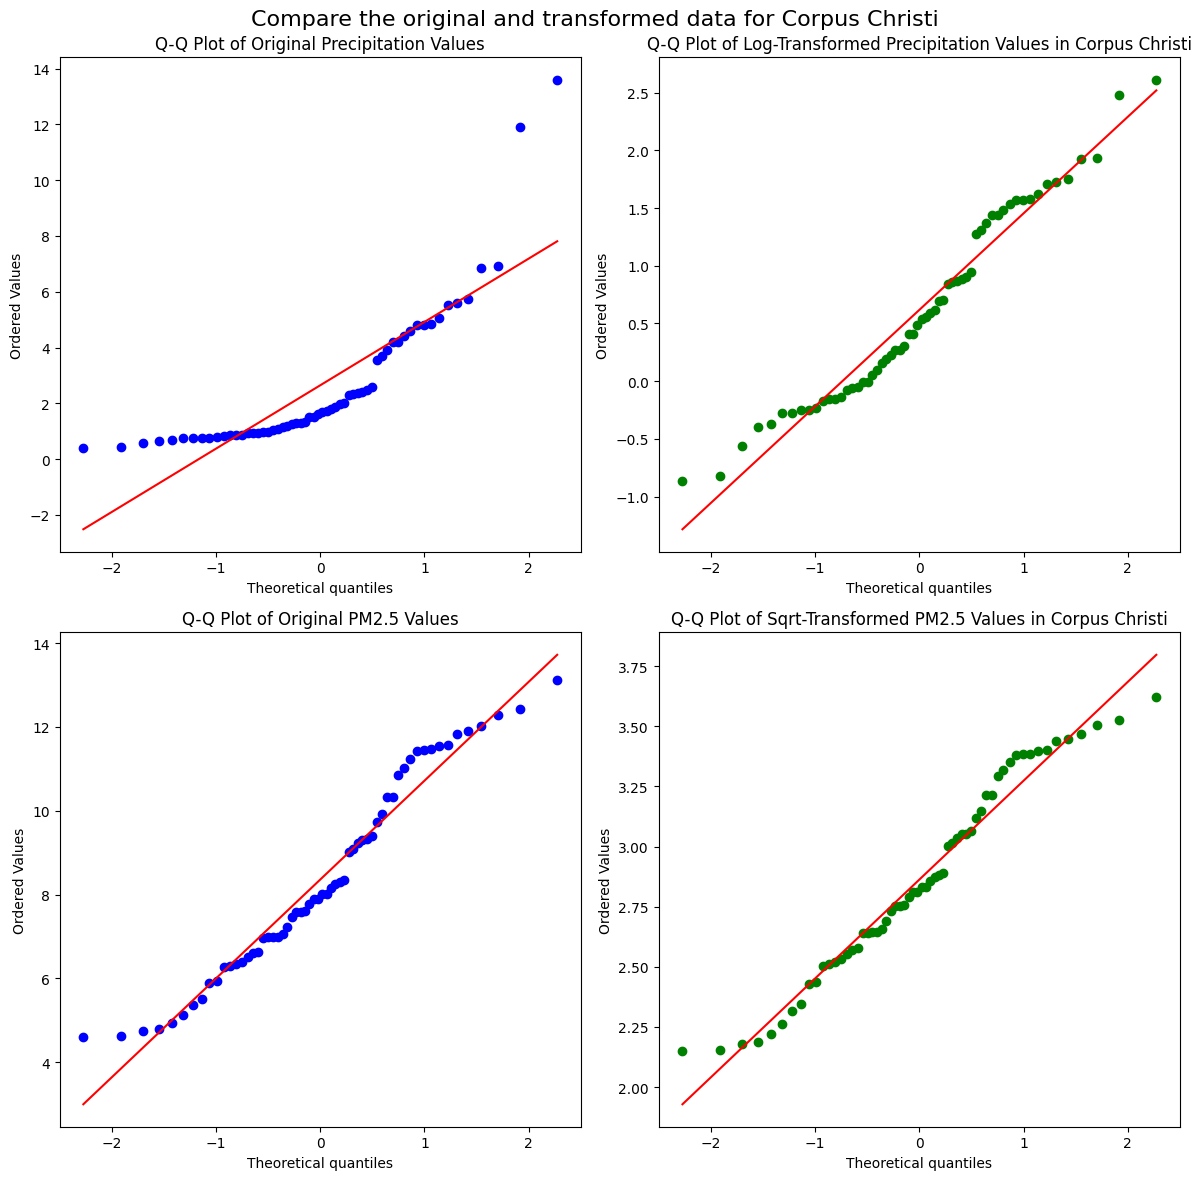

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import probplot
#Let's test the normality of data for Corpus Christi

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 subplot structure

# Original values Q-Q plot for 'ppt_in'
probplot(corpus_air['ppt_in'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot of Original Precipitation Values')
axes[0, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[0, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Log-transformed values Q-Q plot for 'ppt_in'
log_ppt_in = np.log(corpus_air['ppt_in'] + 0.01)  # Log transformation with a small constant
probplot(log_ppt_in, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Log-Transformed Precipitation Values in Corpus Christi')
axes[0, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[0, 1].get_lines()[1].set_color('red')    # Set the color of the line

# Original values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
probplot(corpus_air['Daily_Mean_PM_2_5_Concentration'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Original PM2.5 Values')
axes[1, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[1, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Sqrt-transformed values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
sqrt_pm25 = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])  # Square root transformation
probplot(sqrt_pm25, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sqrt-Transformed PM2.5 Values in Corpus Christi')
axes[1, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[1, 1].get_lines()[1].set_color('red')    # Set the color of the line
fig.suptitle('Compare the original and transformed data for Corpus Christi', fontsize=16)
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Both **log** and **sqrt** transformations have improved the normality of the data, with the sqrt transformation being particularly effective for PM2.5 values in Corpus Christi.

# Compare the original and transformed data for Houston

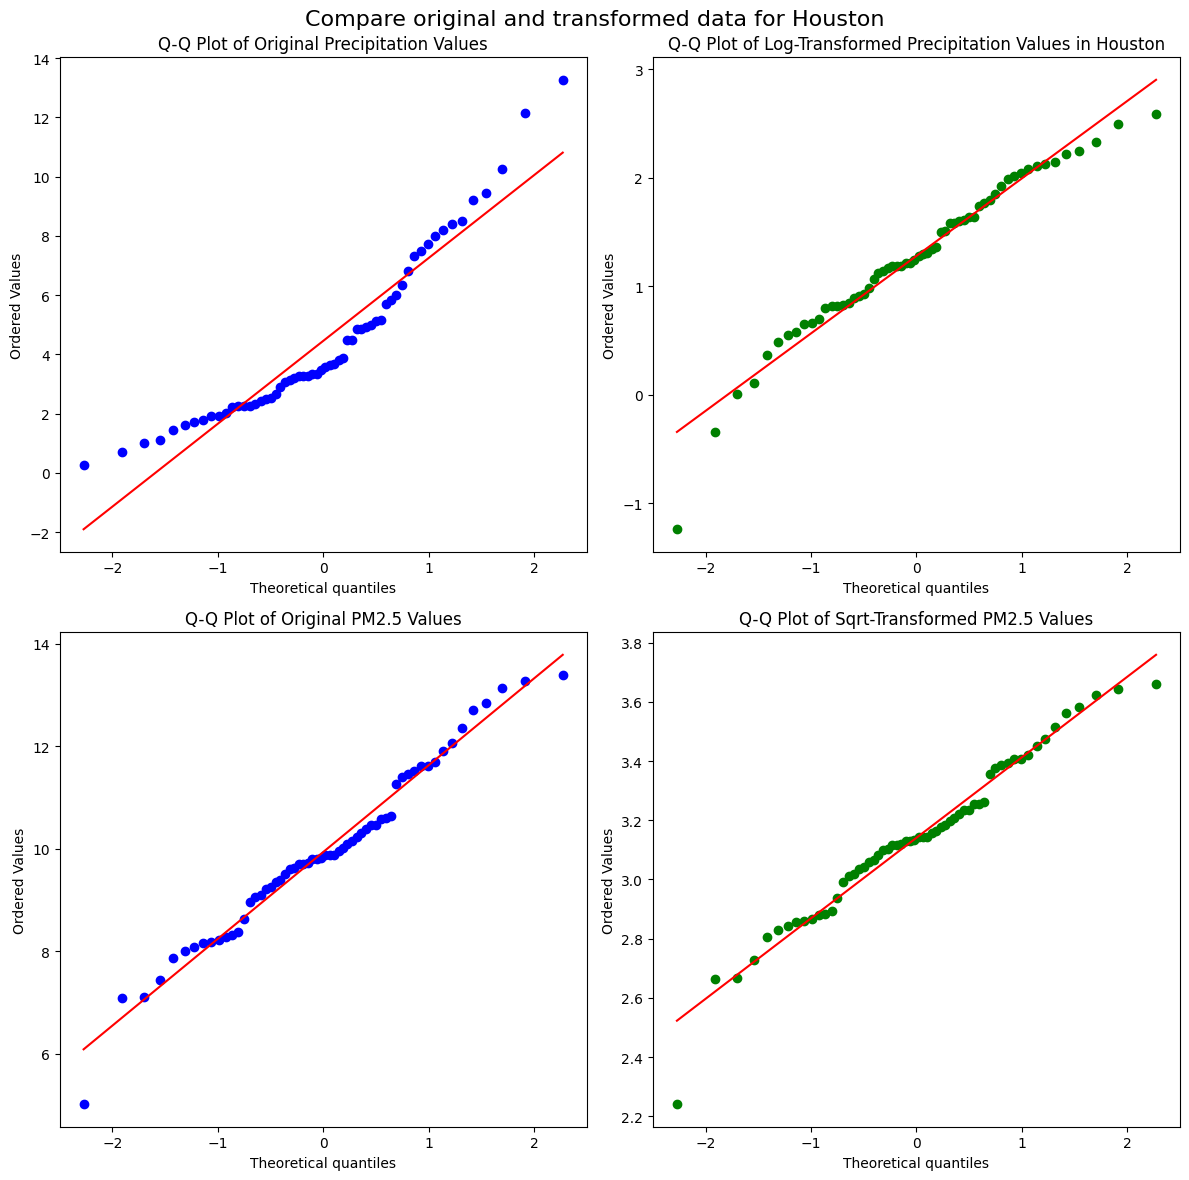

In [ ]:
#check the normality for Houston

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 subplot structure

# Original values Q-Q plot for 'ppt_in'
probplot(houston_air['ppt_in'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot of Original Precipitation Values')
axes[0, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[0, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Log-transformed values Q-Q plot for 'ppt_in'
log_ppt_in = np.log(houston_air['ppt_in'] + 0.01)  # Log transformation with a small constant
probplot(log_ppt_in, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Log-Transformed Precipitation Values in Houston')
axes[0, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[0, 1].get_lines()[1].set_color('red')    # Set the color of the line

# Original values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
probplot(houston_air['Daily_Mean_PM_2_5_Concentration'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Original PM2.5 Values')
axes[1, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[1, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Sqrt-transformed values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
sqrt_pm25 = np.sqrt(houston_air['Daily_Mean_PM_2_5_Concentration'])  # Square root transformation
probplot(sqrt_pm25, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sqrt-Transformed PM2.5 Values')
axes[1, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[1, 1].get_lines()[1].set_color('red')    # Set the color of the line
fig.suptitle('Compare the original and transformed data for Houston', fontsize=16)
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


For **Houston** data, both log transformation for precipitation and square root transformation for PM2.5 values seem to improve the conformity to a normal distribution, which is beneficial for subsequent statistical analyses that assume normality.

# Compare the original and transformed data for Austin

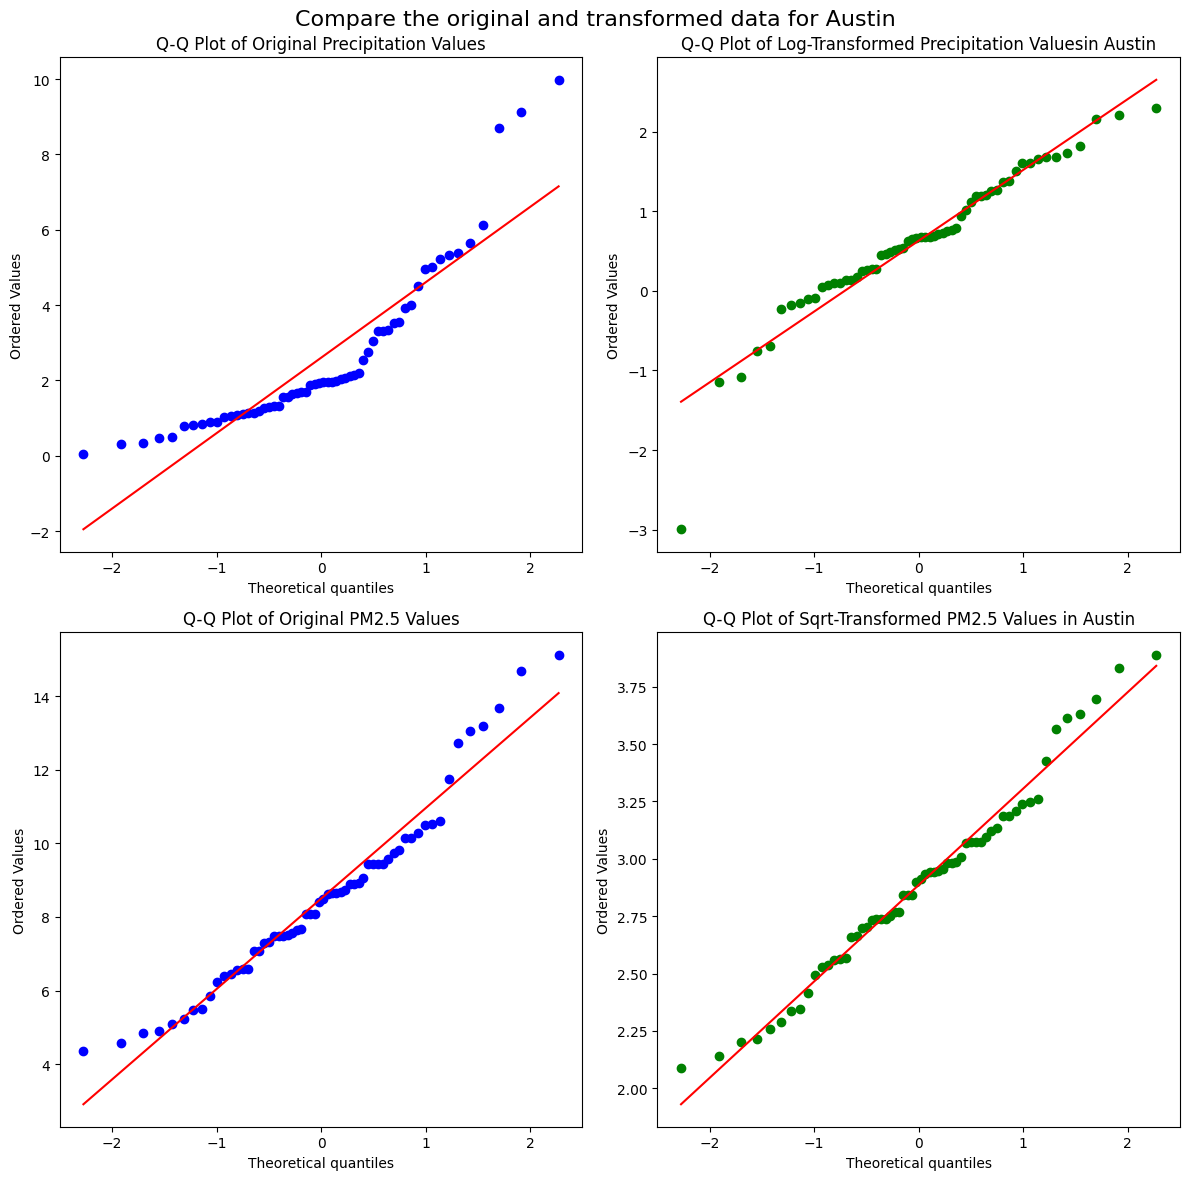

In [ ]:
#Check the normality for Austin
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 subplot structure

# Original values Q-Q plot for 'ppt_in'
probplot(austin_air['ppt_in'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot of Original Precipitation Values')
axes[0, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[0, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Log-transformed values Q-Q plot for 'ppt_in'
log_ppt_in = np.log(austin_air['ppt_in'] + 0.01)  # Log transformation with a small constant
probplot(log_ppt_in, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Log-Transformed Precipitation Valuesin Austin')
axes[0, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[0, 1].get_lines()[1].set_color('red')    # Set the color of the line

# Original values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
probplot(austin_air['Daily_Mean_PM_2_5_Concentration'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Original PM2.5 Values')
axes[1, 0].get_lines()[0].set_color('blue')  # Set the color of the scatter plot
axes[1, 0].get_lines()[1].set_color('red')   # Set the color of the line

# Sqrt-transformed values Q-Q plot for 'Daily_Mean_PM_2_5_Concentration'
sqrt_pm25 = np.sqrt(austin_air['Daily_Mean_PM_2_5_Concentration'])  # Square root transformation
probplot(sqrt_pm25, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Sqrt-Transformed PM2.5 Values in Austin')
axes[1, 1].get_lines()[0].set_color('green')  # Set the color of the scatter plot
axes[1, 1].get_lines()[1].set_color('red')    # Set the color of the line
fig.suptitle('Compare the original and transformed data for Austin', fontsize=16)
# Adjust layout and display the plot
plt.tight_layout()
plt.show()


For **Austin**, both the log transformation for precipitation and the sqrt transformation for PM2.5 values appear to improve the normality of the data. This demonstrates that these transformations might be suitable for subsequent analyses that assume normality.

#First Scenario to check the assumption for Corpus Christi

So far we have checked the normality of the data and did some transformation. Now we will check the relation between precipitation and PM2.5 value in each city.

While we have employed transformation methods for precipitation data, it does not conform to a normal distribution. Therefore, we need to utilize non-parametric tests, such as the **Spearman** test, for Corpus Christi.

The **Spearman** correlation coefficient is a non-parametric measure of rank correlation that assesses how well the relationship between two variables can be described using a monotonic function.

In [ ]:
from scipy.stats import spearmanr


# Apply the log transformation to 'ppt_in' and sqrt transformation to 'Daily_Mean_PM_2_5_Concentration'
corpus_air['log_ppt_in'] = np.log(corpus_air['ppt_in']+0.01)
corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'] = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])

# Perform Spearman rank correlation test
spearman_corr, spearman_p_value = spearmanr(corpus_air['log_ppt_in'], corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'])

print(f"Spearman correlation coefficient: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")


Spearman correlation coefficient: -0.063
P-value: 0.535


Based on the **Spearman** correlation coefficient and the p-value(>0.05), there is no significant monotonic relationship between the two variables we have investigated. So, we **fail to reject the null hypothesis** bold text, we do not have sufficient evidence to reject it.

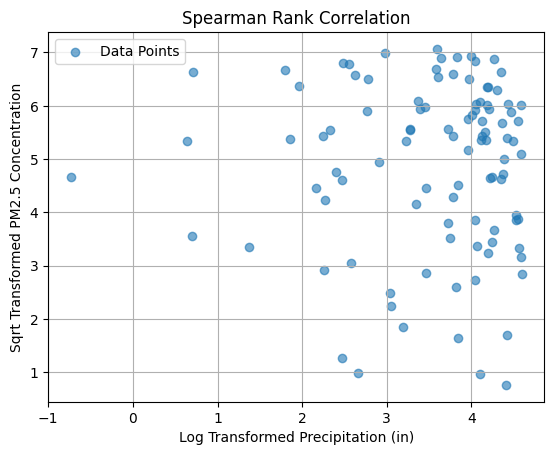

Spearman correlation coefficient: -0.063
P-value: 0.535


In [ ]:
# Generating random data for demonstration purposes
np.random.seed(0)  # For reproducible results
corpus_air = pd.DataFrame({
    'ppt_in': np.random.rand(100) * 100,
    'Daily_Mean_PM_2_5_Concentration': np.random.rand(100) * 50
})

# Apply the log transformation to 'ppt_in' and sqrt transformation to 'Daily_Mean_PM_2_5_Concentration'
corpus_air['log_ppt_in'] = np.log(corpus_air['ppt_in'] +0.01)  # Adding 0.01 to avoid log(0)
corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'] = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])

# Perform Spearman rank correlation test
spearman_corr, spearman_p_value = spearmanr(corpus_air['log_ppt_in'], corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'])

# Plotting the results
plt.scatter(corpus_air['log_ppt_in'], corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'], alpha=0.6, label='Data Points')
plt.title('Spearman Rank Correlation')
plt.xlabel('Log Transformed Precipitation (in)')
plt.ylabel('Sqrt Transformed PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.show()

# Output the Spearman correlation coefficient and p-value
print(f"Spearman correlation coefficient: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")


The scatter plot likely shows a broad spread of data points without a clear or strong pattern. The **weak** Spearman correlation coefficient of -0.063 suggests that there is a very slight negative relationship between the two variables; however, it's so weak that it's almost negligible.

The high p-value of 0.535 indicates that this slight **negative** relationship is not statistically significant. In other words, any uniform relationship observed in the scatter plot can likely be attributed to chance rather than a strong underlying relationship between the variables.

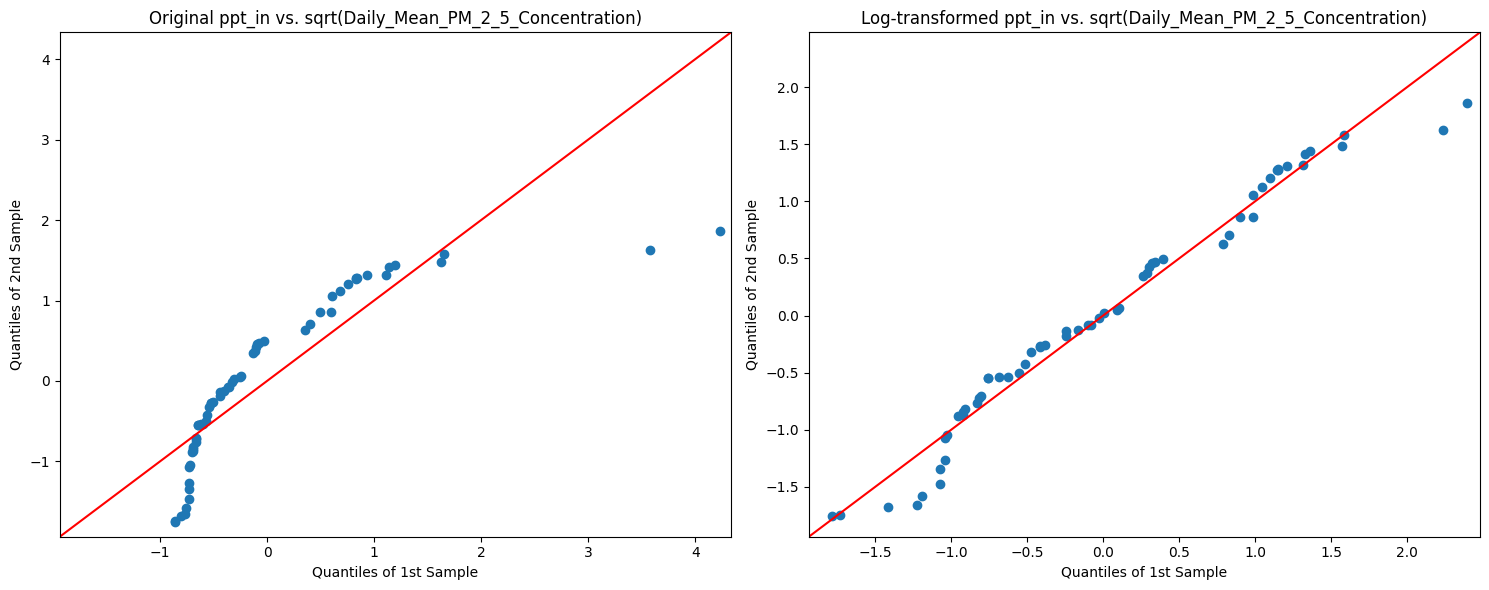

In [ ]:
import statsmodels.api as sm

# Calculate the square root of 'Daily_Mean_PM_2_5_Concentration'
corpus_air['sqrt_Daily_Mean_PM_2_5'] = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])

# Apply logarithmic transformation to 'ppt_in' with a small constant to avoid log(0)
corpus_air['log_ppt_in'] = np.log(corpus_air['ppt_in'] + 0.01)

# Standardizing the variables
ppt_in_standardized = (corpus_air['ppt_in'] - corpus_air['ppt_in'].mean()) / corpus_air['ppt_in'].std()
log_ppt_in_standardized = (corpus_air['log_ppt_in'] - corpus_air['log_ppt_in'].mean()) / corpus_air['log_ppt_in'].std()
sqrt_pm_standardized = (corpus_air['sqrt_Daily_Mean_PM_2_5'] - corpus_air['sqrt_Daily_Mean_PM_2_5'].mean()) / corpus_air['sqrt_Daily_Mean_PM_2_5'].std()

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the Q-Q plot with original 'ppt_in' values on the left
sm.qqplot_2samples(ppt_in_standardized, sqrt_pm_standardized, line='45', ax=axs[0])
axs[0].set_title('Original precipitation vs. sqrt(Daily_Mean_PM_2_5_Concentration)')

# Plotting the Q-Q plot with log-transformed 'ppt_in' values on the right
sm.qqplot_2samples(log_ppt_in_standardized, sqrt_pm_standardized, line='45', ax=axs[1])
axs[1].set_title('Log-transformed precipitation vs. sqrt(Daily_Mean_PM_2_5_Concentration)')

plt.tight_layout()
plt.show()


**Left plot**:Q-Q Plot of original precipitation data versus square root-transformed PM2.5 concentrations, indicating non-normality in the original precipitation data as evidenced by the significant deviation of data points from the reference line, particularly in the lower quantiles.

**Right plot**: Q-Q Plot of log-transformed precipitation data versus square root-transformed PM2.5 concentrations, demonstrating an improved fit towards normality for precipitation data, with a tail that aligns more closely with the reference line, suggesting better normality in the distribution after transformation.

# Generalized Linear Models (GLM) Regression

**GLMs** are used when the relationship between the independent and dependent variables does not satisfy the assumptions of linear regression, particularly with regard to the distribution of the error terms. While we did not reject the null hypothesis, we still prefer to apply the regression model to further ensure that there is no relationship between the variables.

In [ ]:
import statsmodels.api as sm

# Apply the log transformation to 'ppt_in' and sqrt transformation to 'Daily_Mean_PM_2_5_Concentration'
corpus_air['log_ppt_in'] = np.log(corpus_air['ppt_in'] + 0.01)  # Log transformation with a small constant to avoid log(0)
corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'] = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])

# Prepare the data for the model
X = sm.add_constant(corpus_air['log_ppt_in'])  # Add a constant term for the intercept
Y = corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration']

# Fit the GLM
model = sm.GLM(Y, X, family=sm.families.Gaussian()).fit()

# Print the summary of the model
print(model.summary())


                          Generalized Linear Model Regression Results                           
Dep. Variable:     sqrt_Daily_Mean_PM_2_5_Concentration   No. Observations:                   60
Model:                                              GLM   Df Residuals:                       58
Model Family:                                  Gaussian   Df Model:                            1
Link Function:                                 Identity   Scale:                         0.16857
Method:                                            IRLS   Log-Likelihood:                -30.708
Date:                                  Wed, 28 Feb 2024   Deviance:                       9.7773
Time:                                          22:53:24   Pearson chi2:                     9.78
No. Iterations:                                       3   Pseudo R-squ. (CS):           0.001824
Covariance Type:                              nonrobust                                         
                 coef    std e

Our Generalized Linear Model (GLM) analysis, focusing on the relationship between log-transformed precipitation and the square root of daily mean PM2.5 concentration, involved 60 observations. The model yielded a coefficient of 0.0176 for the log-transformed precipitation with a standard error of 0.064. This effect was not statistically significant (p-value = 0.784), indicating a weak relationship. The constant term was estimated at 2.8519, with a tight 95% confidence interval from 2.722 to 2.982, suggesting a strong and significant intercept. Overall, the model's explanatory power appears limited, with a very low pseudo R-squared value.

In [ ]:
import statsmodels.api as sm


# Transform the variables
corpus_air['log_ppt_in'] = np.log(corpus_air['ppt_in'] + 0.01)  # Log transformation, add a small constant to avoid log(0)
corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration'] = np.sqrt(corpus_air['Daily_Mean_PM_2_5_Concentration'])

# Fit a GLM
# Note: GLMs are a class of models, and we need to specify the family (e.g., Gaussian, Binomial)
# For a relationship similar to linear regression, we use the Gaussian family
X = sm.add_constant(corpus_air['log_ppt_in'])  # Add a constant term for the intercept
y = corpus_air['sqrt_Daily_Mean_PM_2_5_Concentration']
glm = sm.GLM(y, X, family=sm.families.Gaussian()).fit()



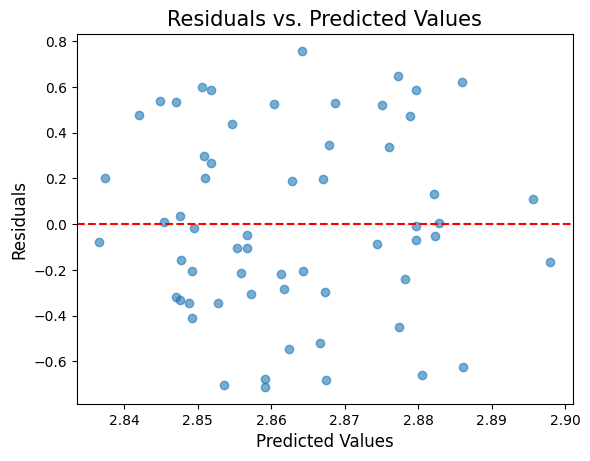

In [ ]:
# Predicted values from the model
corpus_air['predicted'] = glm.predict(X)

# Extracting the residuals from the GLM
corpus_air['residuals'] = glm.resid_response

# We can now work with the residuals for further analysis, such as diagnostic plotting
# For example, plotting residuals vs. predicted values to assess the fit
plt.scatter(corpus_air['predicted'], corpus_air['residuals'], alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs. Predicted Values', fontsize=15)
plt.show()

In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test on the residuals
shapiro_test_result = shapiro(corpus_air['residuals'])

# The Shapiro-Wilk test returns a tuple containing the test statistic and the p-value
shapiro_statistic, shapiro_p_value = shapiro_test_result

print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}, P-value: {shapiro_p_value}")

# Interpretation of the p-value:
# A p-value less than 0.05 typically means the residuals do not follow a normal distribution
if shapiro_p_value < 0.05:
    print("The residuals do not follow a normal distribution (reject H0).")
else:
    print("The residuals follow a normal distribution (fail to reject H0).")


Shapiro-Wilk Test Statistic: 0.9593862295150757, P-value: 0.043912697583436966
The residuals do not follow a normal distribution (reject H0).


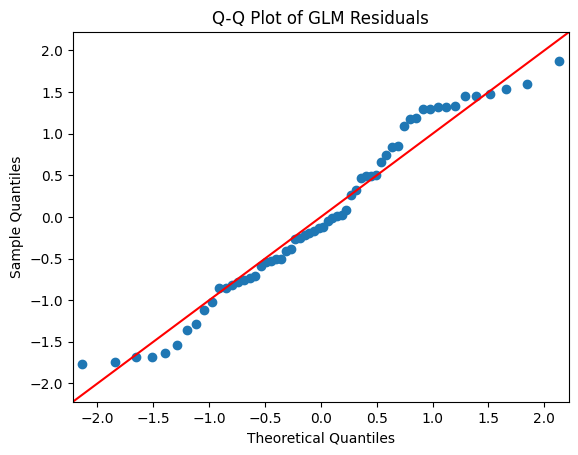

In [ ]:
# We already have the residuals in corpus_air DataFrame as 'residuals'
# Generate Q-Q plot for the residuals
fig = sm.qqplot(corpus_air['residuals'], line='45', fit=True)

# Customize the plot
plt.title('Q-Q Plot of GLM Residuals')
plt.show()


We evaluated the normality of the residuals from our **Generalized Linear Model(GLM)** with transformed variables using the **Shapiro-Wilk** test, which resulted in a p-value slightly below the threshold of 0.05. This suggests a slight deviation from normality. However, the Q-Q plot and the test statistic near one imply the residuals are approximately normally distributed.

#Second scenario to check the assumption for Corpus Christi

In this step, we aim to normalize the precipitation variable using a different method than in the previous analysis. Here, we will employ the **Box-Cox** transformation.

In [ ]:
from scipy import stats

# if there are zeros, we can add a small constant to all values.
#corpus_air['ppt_in'] = corpus_air['ppt_in'] + 0.01

# Perform the Box-Cox transformation
corpus_air['ppt_in_boxcox'], fitted_lambda = stats.boxcox(corpus_air['ppt_in'])

# Print the lambda that was found to be best
print(f"Best fitting lambda: {fitted_lambda}")

# Now wecan perform the Shapiro-Wilk test on the transformed data
shapiro_stat, shapiro_p_value = shapiro(corpus_air['ppt_in_boxcox'])
print(f"Shapiro-Wilk Test Statistic = {shapiro_stat}, p-value = {shapiro_p_value}")

Best fitting lambda: -0.23310517858682836
Shapiro-Wilk Test Statistic = 0.9710533022880554, p-value = 0.16427679359912872


In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient
corr_coefficient, p_value = pearsonr(corpus_air['ppt_in_boxcox'], corpus_air['Daily_Mean_PM_2_5_Concentration_sqrt'])

print(f"Pearson's correlation coefficient: {corr_coefficient}, P-value: {p_value}")

Pearson's correlation coefficient: 0.025309988899824675, P-value: 0.8477759564118401


The Box-Cox transformation successfully normalized the precipitation data, as indicated by the Shapiro-Wilk test. However, when examining the relationship between the normalized precipitation data and the square root transformed PM2.5 concentrations, Pearson's correlation test reveals a **negligible** and statistically **insignificant** linear correlation. Therefore, based on these analyses, there is **no evidence to suggest a meaningful linear relationship** between rainfall (precipitation) and PM2.5 concentration levels.

In [ ]:
import statsmodels.api as sm

X = corpus_air['ppt_in_boxcox']  # Independent variable
y = corpus_air['Daily_Mean_PM_2_5_Concentration_sqrt']  # Dependent variable

# Add a constant to the independent variable to include an intercept in the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Daily_Mean_PM_2_5_Concentration_sqrt   R-squared:                       0.001
Model:                                              OLS   Adj. R-squared:                 -0.017
Method:                                   Least Squares   F-statistic:                   0.03718
Date:                                  Fri, 01 Mar 2024   Prob (F-statistic):              0.848
Time:                                          23:35:10   Log-Likelihood:                -30.728
No. Observations:                                    60   AIC:                             65.46
Df Residuals:                                        58   BIC:                             69.64
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                    coef    st

This regression model suggests that there is no significant linear relationship between Box-Cox transformed precipitation and the square root transformed PM2.5 concentration levels. The predictors do not significantly explain the variability in PM2.5 concentrations, as evidenced by the very low R-squared value and the non-significant p-value for the precipitation coefficient.

**Coclusion:**

**Fail to reject the null hypothesis**: There is no support for the hypothesis that rainfall leads to a decrease in PM2.5 levels in Corpus Christi. The statistical evidence indicates a weak and **non-significant relationship** between rainfall and PM2.5. Additionally, the regression model's assumptions may be violated due to non-normally distributed residuals.Therefore, the hypothesis that rainfall leads to a decrease in PM2.5 levels is not supported by the data.

# Check the assumption for Houston

In [ ]:
from scipy.stats import pearsonr
houston_air['sqrt_ppt_in'] = np.sqrt(houston_air['ppt_in'])

# Calculate Pearson's correlation
corr_coefficient, p_value = pearsonr(houston_air['sqrt_ppt_in'], houston_air['Daily_Mean_PM_2_5_Concentration'])

print(f"Pearson's correlation coefficient: {corr_coefficient}, P-value: {p_value}")

Pearson's correlation coefficient: -0.2521620324782269, P-value: 0.05193333090335626


Pearson's correlation analysis showed a weak negative relationship between square root-transformed precipitation and PM2.5 concentrations, with a correlation coefficient of -0.252. This suggests that as precipitation increases, PM2.5 concentrations slightly decrease, which aligns with the direction of the hypothesis. However, the p-value of 0.0519 slightly exceeds the conventional significance level (> 0.05), indicating that the evidence is **not strong enough to statistically reject the null hypothesis** of no correlation.

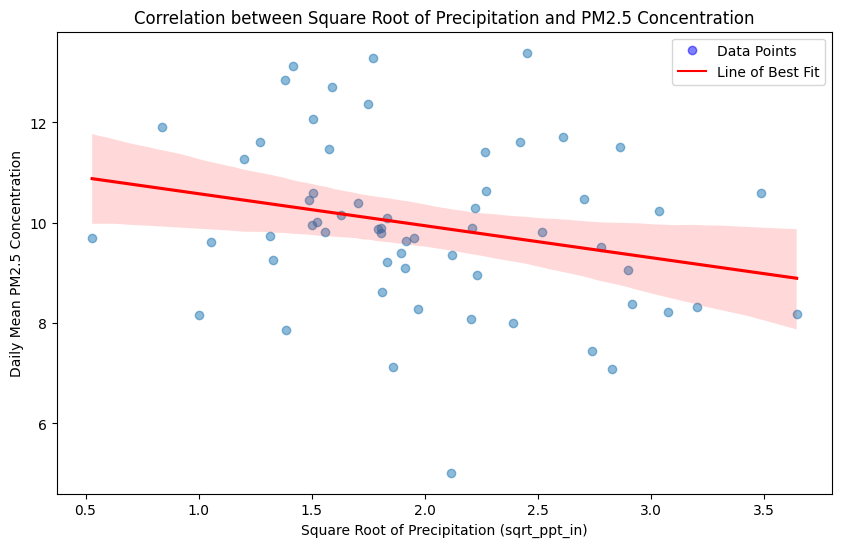

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x='sqrt_ppt_in', y='Daily_Mean_PM_2_5_Concentration', data=houston_air,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red', 'label':'Line of Best Fit'})
plt.title('Correlation between Square Root of Precipitation and PM2.5 Concentration')
plt.xlabel('Square Root of Precipitation (sqrt_ppt_in)')
plt.ylabel('Daily Mean PM2.5 Concentration')

# Adding a legend manually
# The label for the scatter plot part isn't automatically handled by regplot, so  may need to create a proxy artist for it
import matplotlib.lines as mlines
scatter_legend = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', alpha=0.5, label='Data Points')
plt.legend(handles=[scatter_legend, mlines.Line2D([], [], color='red', label='Line of Best Fit')])

plt.show()

The scatter plot with the square root of precipitation and PM2.5 concentration shows a weak negative correlation, indicated by a downward-sloping trend line. The spread of the data points suggests considerable variability and a relatively weak predictive relationship between the two variables.

In [ ]:
import statsmodels.api as sm

# Apply the square root transformation to 'ppt_in'
houston_air['sqrt_ppt_in'] = np.sqrt(houston_air['ppt_in'])

# Prepare the data for the model
X = houston_air['sqrt_ppt_in']  # Predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor for the intercept
Y = houston_air['Daily_Mean_PM_2_5_Concentration']  # Response variable

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())


                                   OLS Regression Results                                  
Dep. Variable:     Daily_Mean_PM_2_5_Concentration   R-squared:                       0.064
Model:                                         OLS   Adj. R-squared:                  0.047
Method:                              Least Squares   F-statistic:                     3.938
Date:                             Thu, 29 Feb 2024   Prob (F-statistic):             0.0519
Time:                                     01:09:15   Log-Likelihood:                -113.52
No. Observations:                               60   AIC:                             231.0
Df Residuals:                                   58   BIC:                             235.2
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]


The OLS regression results show a model with a low R-squared value of 0.064, indicating that only about 6.4% of the variability in daily mean PM2.5 concentration is explained by the square root of precipitation. The adjusted R-squared is slightly lower, suggesting minimal improvement over a model without predictors. The model is at the borderline of statistical significance with an F-statistic probability (p-value) of 0.0519, just above the common alpha level of 0.05. The coefficient for the square root of precipitation is negative (-0.6379), which aligns with the hypothesis that increased precipitation is associated with lower PM2.5 concentrations, but this relationship is again only marginally significant (p-value = 0.052). The constant term is significantly different from zero. The diagnostics for normality indicate that the residuals of the model are normally distributed, which is good for the validity of the OLS assumptions. Overall, the model shows a weak and marginally significant relationship between precipitation and PM2.5 concentration.

# Check the assumption for Asutin

In [ ]:
from scipy.stats import spearmanr


# Apply the log transformation to 'ppt_in' and sqrt transformation to 'Daily_Mean_PM_2_5_Concentration'
austin_air['log_ppt_in'] = np.log(austin_air['ppt_in']+0.01)
austin_air['sqrt_Daily_Mean_PM_2_5_Concentration'] = np.sqrt(austin_air['Daily_Mean_PM_2_5_Concentration'])

# Perform Spearman rank correlation test
spearman_corr, spearman_p_value = spearmanr(austin_air['log_ppt_in'], austin_air['sqrt_Daily_Mean_PM_2_5_Concentration'])

print(f"Spearman correlation coefficient: {spearman_corr:.3f}")
print(f"P-value: {spearman_p_value:.3f}")


Spearman correlation coefficient: -0.023
P-value: 0.859


According to the results of Spearman's rank correlation test, no significant monotonic relationship exists between the transformed PM2.5 concentration and precipitation in the Austin dataset. Therefore, we **cannot reject the null hypothesis**.

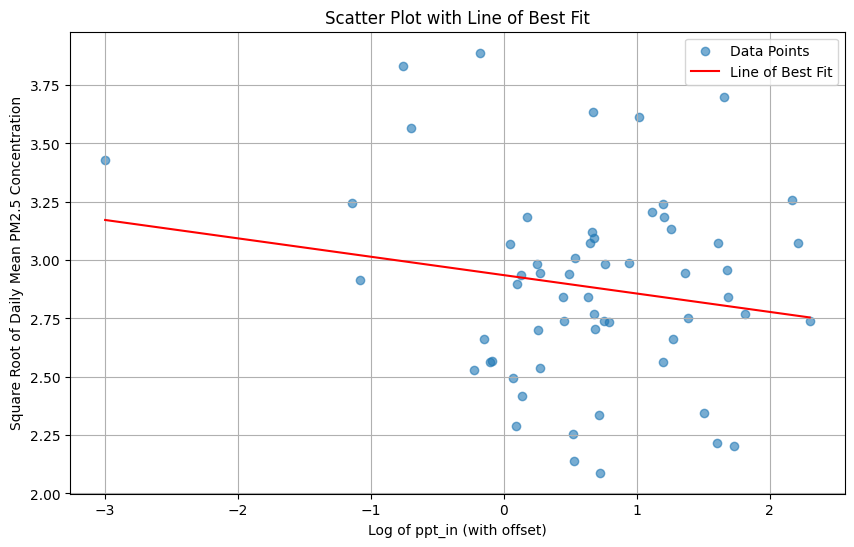

In [ ]:
# Calculate coefficients for the line of best fit
coefficients = np.polyfit(austin_air['log_ppt_in'], austin_air['sqrt_Daily_Mean_PM_2_5_Concentration'], 1)
polynomial = np.poly1d(coefficients)

# Generate x values (from min to max of log_ppt_in) for plotting the line
x_values = np.linspace(austin_air['log_ppt_in'].min(), austin_air['log_ppt_in'].max(), 100)

# Generate y values using the polynomial
y_values = polynomial(x_values)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(austin_air['log_ppt_in'], austin_air['sqrt_Daily_Mean_PM_2_5_Concentration'], alpha=0.6, label='Data Points')
plt.plot(x_values, y_values, 'r-', label='Line of Best Fit')  # 'r-' specifies a red line
plt.title('Scatter Plot with Line of Best Fit')
plt.xlabel('Log of ppt_in (with offset)')
plt.ylabel('Square Root of Daily Mean PM2.5 Concentration')
plt.grid(True)
plt.legend()
plt.show()


The scatter plot shows a weak and non-significant negative relationship between the square root of precipitation and the log-transformed PM2.5 concentration. The regression line slopes downward slightly, but the wide confidence interval and the spread of the data points indicate a high level of uncertainty and variability not captured by this linear model.

In [ ]:
import statsmodels.api as sm

# Apply the log transformation to 'Daily_Mean_PM_2_5_Concentration' and sqrt transformation to 'ppt_in'
austin_air['log_Daily_Mean_PM_2_5_Concentration'] = np.log(austin_air['Daily_Mean_PM_2_5_Concentration'])
austin_air['sqrt_ppt_in'] = np.sqrt(austin_air['ppt_in'])

# Prepare the data for the model
X = austin_air['sqrt_ppt_in']  # Predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor for the intercept
Y = austin_air['log_Daily_Mean_PM_2_5_Concentration']  # Response variable

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())


                                     OLS Regression Results                                    
Dep. Variable:     log_Daily_Mean_PM_2_5_Concentration   R-squared:                       0.006
Model:                                             OLS   Adj. R-squared:                 -0.011
Method:                                  Least Squares   F-statistic:                    0.3662
Date:                                 Thu, 29 Feb 2024   Prob (F-statistic):              0.547
Time:                                         01:27:26   Log-Likelihood:                -9.7119
No. Observations:                                   60   AIC:                             23.42
Df Residuals:                                       58   BIC:                             27.61
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                  coef    std err       

The OLS regression results show a very weak and statistically insignificant relationship between the square root of precipitation and log-transformed PM2.5 concentrations, with only 0.6% of the variance explained by the model. The lack of statistical significance (p-value: 0.547) suggests no evidence of a meaningful association between these variables in the dataset.

# Second scenario to check the assumption for Austin

In this step, we aim to normalize the precipitation variable using a different method than in the previous analysis. Here, we will employ the Box-Cox transformation.

In [ ]:
from scipy import stats

# if there are zeros, we can add a small constant to all values.


# Perform the Box-Cox transformation
austin_air['ppt_in_boxcox'], fitted_lambda = stats.boxcox(austin_air['ppt_in'])

# Print the lambda that was found to be best
print(f"Best fitting lambda: {fitted_lambda}")

# Now wecan perform the Shapiro-Wilk test on the transformed data
shapiro_stat, shapiro_p_value = shapiro(austin_air['ppt_in_boxcox'])
print(f"Shapiro-Wilk Test Statistic = {shapiro_stat}, p-value = {shapiro_p_value}")

Best fitting lambda: 0.2622867485767378
Shapiro-Wilk Test Statistic = 0.9787154197692871, p-value = 0.37665224075317383


The Box-Cox transformation successfully made the precipitation data more normally distributed, as evidenced by the results of the Shapiro-Wilk test.

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient
corr_coefficient, p_value = pearsonr(austin_air['ppt_in_boxcox'], austin_air['sqrt_Daily_Mean_PM_2_5_Concentration'])

print(f"Pearson's correlation coefficient: {corr_coefficient}, P-value: {p_value}")

Pearson's correlation coefficient: -0.12732289312549688, P-value: 0.33232306363992137


The analysis of the linear relationship between this transformed precipitation data and another variable shows a weak and non-significant negative correlation. This means that, based on the data provided, there is no strong evidence to suggest a meaningful linear relationship between the variables. Considering the p-value, we **faile to reject the null hypothesis**.

In [ ]:
import statsmodels.api as sm

X = austin_air['ppt_in_boxcox']  # Independent variable
y = austin_air['sqrt_Daily_Mean_PM_2_5_Concentration']  # Dependent variable

# Add a constant to the independent variable to include an intercept in the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     sqrt_Daily_Mean_PM_2_5_Concentration   R-squared:                       0.016
Model:                                              OLS   Adj. R-squared:                 -0.001
Method:                                   Least Squares   F-statistic:                    0.9557
Date:                                  Sat, 02 Mar 2024   Prob (F-statistic):              0.332
Time:                                          01:12:02   Log-Likelihood:                -31.282
No. Observations:                                    60   AIC:                             66.56
Df Residuals:                                        58   BIC:                             70.75
Df Model:                                             1                                         
Covariance Type:                              nonrobust                                         
                    coef    st

The regression model suggests a very **weak** and statistically non-significant relationship between the transformed precipitation data and the square root of daily mean PM2.5 concentration. The model explains a very small portion of the variance in PM2.5 concentrations, indicating that other factors not included in the model may be more influential in determining PM2.5 levels.

The hypothesis testing across three cities—Corpus Christi, Houston, and Austin—involved various statistical methods to evaluate whether rainfall influences PM2.5 levels.
Despite employing transformations to normalize data and applying different statistical tests, including correlation and regression analyses, the evidence **did not conclusively support the hypothesis** that rainfall decreases PM2.5 levels.

Results indicated **weak, non-significant**, or only marginally significant **relationships between rainfall and PM2.5 concentrations**. Consequently, **the null hypothesis** that rainfall does not lead to a decrease in PM2.5 levels could **not be rejected** based on the available data.